# Chater3. 추정1


## 3.1 주사위 문제

4면체, 6면체, 8면체, 12면체, 20면체 주사위가 든 상자가 있다고 해보자.

상자에서 임의로 주사위 하나를 집어서 던졌더니 6이 나왔다.  
이 경우 각 주사위를 선택했을 확률을 어떻게 될까?  

1. 가설을 나타내자.
2. 데이터를 나타내자.
3. 우도(likelihood) 함수를 작성하자.

![title](/notebooks/project/image/dice.jpeg )

In [1]:
from __future__ import print_function, division

% matplotlib inline

import thinkplot
from thinkbayes2 import Hist, Pmf, Suite, Cdf

In [2]:
class Dice(Suite):
    def Likelihood(self, data, hypo):  # hypo: 주사위의 면
        if hypo < data:# 주사위를 굴려서 나온 값이 주사위의 면수 보다 크다
            return 0
        else:
            return 1/hypo 

In [3]:
suite = Dice([4,6,8,12,20])
suite.Print()

4 0.2
6 0.2
8 0.2
12 0.2
20 0.2


In [5]:
suite.Update(6)
# 6 이 나왔을 때 사후 확률 분포
suite.Print()

4 0.0
6 0.5256241787122207
8 0.29566360052562424
12 0.13140604467805517
20 0.04730617608409988


In [35]:
for roll in [6, 8, 7, 7, 5, 4]:
    suite.Update(roll)
suite.Print()

4 0.0
6 0.0
8 0.9432484536722127
12 0.055206128061290875
20 0.001545418266496554


## 3.2 기관차 문제
  
*각 철도에는 이를 지나가는 기관차에 1부터 N까지의 순서로 번호를 붙인다.  
어느날 60호 기차를 보았다. 이 때 이 철도에는 몇 개의 기관차가 지나가는지 추측해보자.*
  
1. 데이터를 보기 전에 N에 대해서 알고 있는 것이 무엇인가? <span style="color:blue;"> - 
사전확률<span>
2. N에 어떤 값이 주어졌을 때 관측한 데이터(60호 기관차)의 우도는 어떻게 되는가? <span style="color:blue;"> - 
우도<span>

In [36]:
# N값은 1부터 1000까지의 어떤 값이든 동일한 확률로 선택될 수 있다고 가정한다.
hypos = range(1, 1001)

In [37]:
class Train(Suite):
    def Likelihood(self, data, hypo):
        if hypo < data:
            return 0
        else:
            return 1/hypo

In [38]:
suite = Train(hypos)
suite.Update(60)

0.0028222671142652746

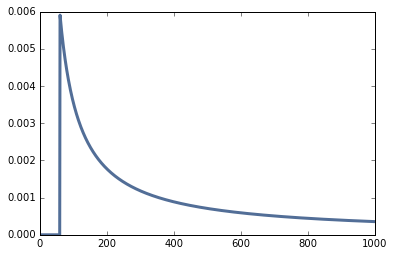

In [39]:
thinkplot.Pdf(suite)

In [40]:
def Mean(suite):
    total=0
    for hypo, prob in suite.Items():
        total += hypo * prob
    return total

In [41]:
print (Mean(suite))
print (suite.Mean())

333.41989326371095
333.41989326371095


## 3.3 사전 확률로 할 수 있는 것
- 데이터를 더 확보할 것
- 배경 지식을 더 확보할 것

60호 기관차에 이어 30번과 90번 기관차도 봤다고 가정

In [42]:
def MakePosterior(high, dataset, constructor=Train):
    """Solves the train problem.
    
    high: int maximum number of trains
    dataset: sequence of observed train numbers
    constructor: function used to construct the Train object
    
    returns: Train object representing the posterior suite
    """
    hypos = range(1, high+1)
    suite = constructor(hypos)

    for data in dataset:
        suite.Update(data)

    return suite

In [43]:
dataset = [30, 60, 90]

for high in [500, 1000, 2000]:
    suite = MakePosterior(high, dataset)
    print(high, suite.Mean())

500 151.84958795903822
1000 164.30558642273363
2000 171.33818109150937


## 3.4 사전 확률의 대안

<span style="color:red;"> - 
회사의 규모의 분포는 멱법칙을 따른다.<span>
- 기관차가 10대 미만인회사가 1000개 일 때
- 기관차를 100대 정도를 소유한 회사는 100개
- 기관차를 1000대 정도를 소유한 회사는 10개  

소기업> 중견기업> 대기업  

In [44]:
from IPython.display import display, Math, Latex
display(Math(r'PMF(x) \propto  \Big(\frac{1}{x} \Big)^\alpha'))

<IPython.core.display.Math object>

In [45]:
class Train2(Train):
    def __init__(self, hypos, alpha=1.0):
        Pmf.__init__(self)
        for hypo in hypos:
            self[hypo] = hypo**(-alpha)
        self.Normalize()

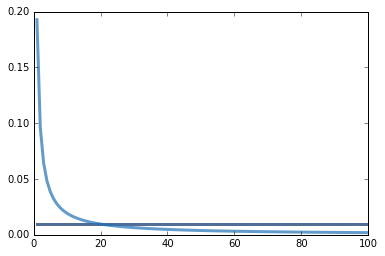

In [46]:
high = 100
hypos = range(1, high+1)
suite1 = Train(hypos)
suite2 = Train2(hypos)
thinkplot.Pdf(suite1)
thinkplot.Pdf(suite2)

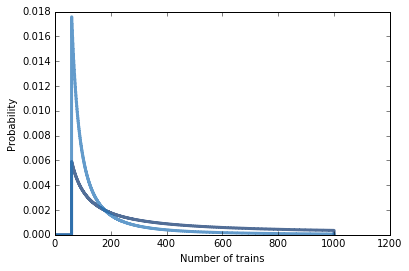

In [47]:
dataset  = [60]
high = 1000

thinkplot.PrePlot(num=2)

constructors = [Train, Train2]
labels = ['uniform', 'power law']

for constructor, label in zip(constructors, labels):
    suite = MakePosterior(high, dataset, constructor)
    suite.label = label
    thinkplot.Pmf(suite)
    
thinkplot.Config(xlabel = 'Number of trains', ylabel='Probability')


In [48]:
dataset = [30, 60, 90]

for high in [500, 1000, 2000]:
    suite = MakePosterior(high, dataset, Train2)
    print(high, suite.Mean())

500 130.70846986256004
1000 133.2752313750312
2000 133.99746308073065


## 3.5 신뢰구간
점 추정은 보통 평균, 중간값, 최대 우도값을 사용한다.
구간의 경우 보통 미확인 값이 어느 두 값 사이에 올 확률이 90%(혹은 다른 확률)인 값을 나타낸다.  
이 값들이 신뢰구간을 정의한다.

In [49]:
hypos = range(1, 1001)
suite = Train(hypos)
suite.Update(60)

suite.Percentile(5), suite.Percentile(95)

(69, 869)

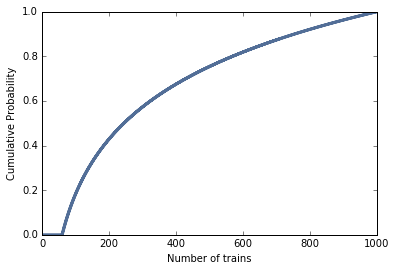

In [50]:
cdf = Cdf(suite)
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel="Number of trains",
                 ylabel="Cumulative Probability",
                 legend=False
                )

In [51]:
cdf.Percentile(5), cdf.Percentile(95)

(69, 869)